Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2041720229
Nama: Safira Istifarini
Kelas:TI 3H

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

### Persiapan Data

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data
data = pd.read_csv('online.csv')
data.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [3]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\SAFIRA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


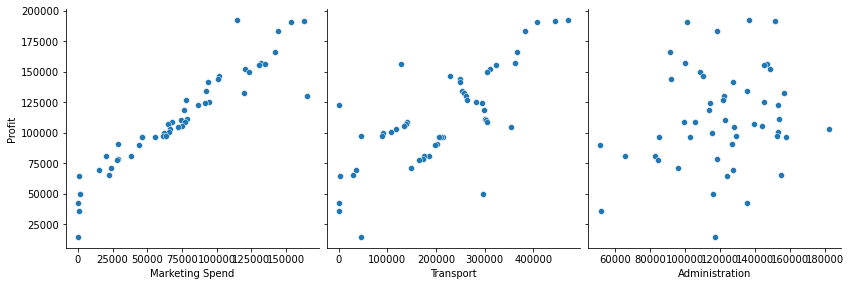

In [5]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Marketing Spend', 'Transport', 'Administration'], 
             y_vars='Profit', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

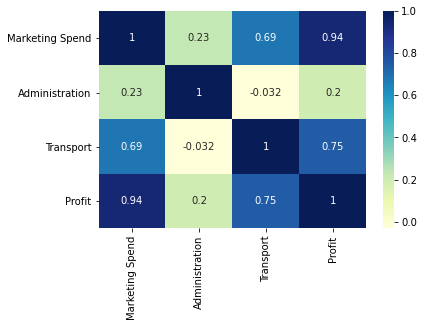

In [6]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa profit memiliki korelasi yang paling kuat terhadap marketing spend

### Regresi Linier

In [7]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Marketing Spend']
y = data['Profit']

In [8]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [9]:
# hasil training dtaset
X_train
y_train

25    107404.34
26    105733.54
35     96479.51
17    125370.37
7     155752.60
47     42559.73
31     97483.56
32     97427.84
19    122776.86
21    111313.02
13    134307.35
1     191792.06
4     166187.94
12    141585.52
27    105008.31
40     78239.91
22    110352.25
29    101004.64
9     149759.96
16    126992.93
44     65200.33
48     35673.41
46     49490.75
14    132602.65
41     77798.83
2     191050.39
34     96712.80
30     99937.59
10    146121.95
15    129917.04
23    108733.99
39     81005.76
3     182901.99
24    108552.04
8     152211.77
Name: Profit, dtype: float64

In [10]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [11]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const              50904.496780
Marketing Spend        0.806614
dtype: float64

In [12]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     291.2
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           6.15e-18
Time:                        17:23:08   Log-Likelihood:                -378.70
No. Observations:                  35   AIC:                             761.4
Df Residuals:                      33   BIC:                             764.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             5.09e+04   4307.136     11.819      0.000    4.21e+04    5.97e+04
Marketing Spend     0.8066      0.047     17.064      0.000       0.710       0.903
==============================================================================
Omnibus:                       39.492   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.303
Skew:                          -2.417   Prob(JB):                     1.15e-34
Kurtosis:                      12.155   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

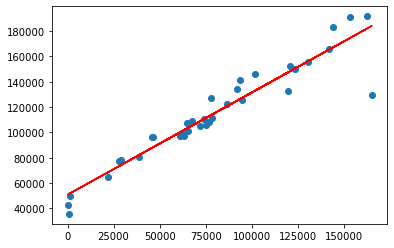

In [13]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 5.09e+04 + 0.8066*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [14]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\SAFIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


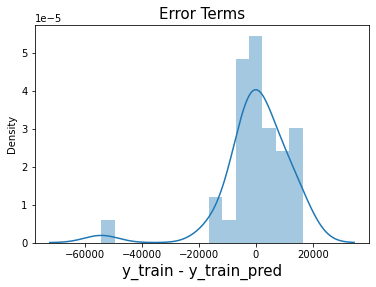

In [15]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

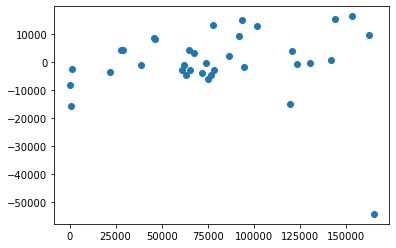

In [16]:
plt.scatter(X_train,res)
plt.show()

In [17]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

6     159487.231607
36     74025.091184
37     86451.942034
28    104182.587432
43     63411.638002
dtype: float64

In [18]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8365118984763031

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.898 sedangkan dari data testing adalah 0.836. Hal ini berarti model yang dibentuk stabil (tidak berselisih jauh antara training dengan testing)

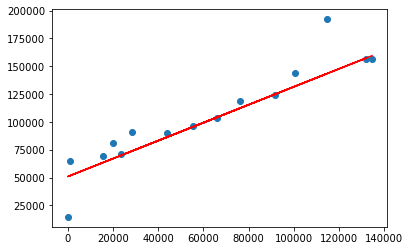

In [19]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [ ]:
# regresi Linier ganda

In [20]:
xbaru = data[['Marketing Spend', 'Transport']]
ybaru = data['Profit']

In [21]:
xConst = sm.add_constant(xbaru)

In [22]:
model = sm.OLS(ybaru, xConst).fit()
predictions = model.predict(xConst)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.82e-24
Time:                        17:23:40   Log-Likelihood:                -542.97
No. Observations:                  50   AIC:                             1092.
Df Residuals:                      47   BIC:                             1098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.632e+04   3843.979     

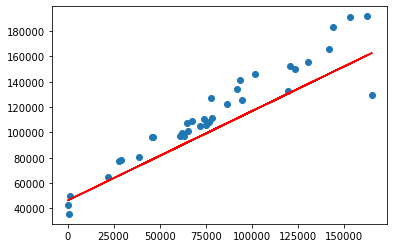

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 4.632e+04 + 0.7046*X_train, 'r')
plt.show()

In [37]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\SAFIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


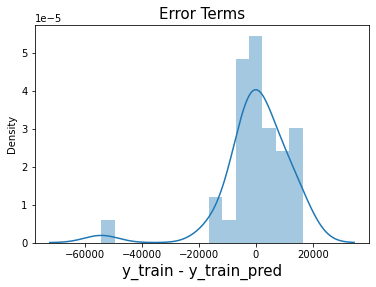

In [38]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

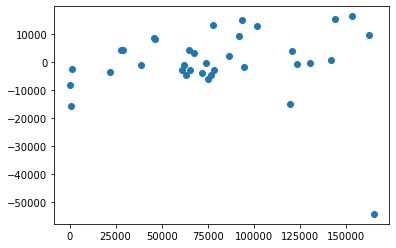

In [34]:
plt.scatter(X_train,res)
plt.show()

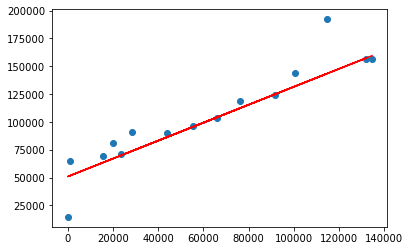

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()